In [1]:
#Dependencies 
import requests 
import json 
from config import api_key
from citipy import citipy 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import time 


In [2]:
#create empty lists to hold cities and lat_long 
cities = []
lat_long = []

In [3]:
#randomly create a list of lat and long  
lat = np.random.uniform(low=-90, high=90, size=550)
long = np.random.uniform(low=-180, high=180, size=550)
lat_long = zip(lat, long)


In [4]:
#Use citipy to generate the closest cities to random coordinates 
for x in lat_long:
    cities.append(citipy.nearest_city(x[0], x[1]).city_name)

In [43]:
print(len(cities))
print(cities)

550
['port elizabeth', 'avarua', 'avarua', 'bluff', 'albany', 'bluff', 'iqaluit', 'barrow', 'ponta do sol', 'tra vinh', 'athabasca', 'busselton', 'salvador', 'mahebourg', 'zhigansk', 'san quintin', 'komsomolskiy', 'new norfolk', 'busselton', 'san cristobal', 'busselton', 'lavrentiya', 'atuona', 'torbay', 'umzimvubu', 'serang', 'ushuaia', 'talnakh', 'tocopilla', 'nelson bay', 'launceston', 'flinders', 'puerto ayora', 'bluff', 'hermanus', 'diego de almagro', 'kuala krai', 'attawapiskat', 'punta arenas', 'caxito', 'raga', 'clyde river', 'kyshtovka', 'tasiilaq', 'saint-joseph', 'velingara', 'mar del plata', 'avarua', 'katsuura', 'punta arenas', 'denia', 'iqaluit', 'mahebourg', 'necochea', 'lebu', 'cape town', 'redlands', 'srednekolymsk', 'atuona', 'busselton', 'hithadhoo', 'auki', 'punta arenas', 'bredasdorp', 'ulaanbaatar', 'saint-philippe', 'upernavik', 'yellowknife', 'roald', 'arraial do cabo', 'nampula', 'sinazongwe', 'punta arenas', 'comodoro rivadavia', 'taolanaro', 'huanren', 'longy

In [6]:
#Use openweather api to retrieve data 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_lat = []
city_name = []

# Build partial query URL
query_url = f"{url}units=Imperial&APPID={api_key}"


In [14]:
#Looping through for the list values 
for city in cities: 
    #Use try and except method in case data are not readable
    try:
        response = requests.get(query_url + '&q=' + city).json()
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_lat.append(response['coord']['lat'])
        city_name.append(response['name'])
    except:
        pass

In [15]:
print(response)

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.31, 'pressure': 1014.99, 'humidity': 98, 'temp_min': 80.31, 'temp_max': 80.31, 'sea_level': 1014.99, 'grnd_level': 1014.93}, 'wind': {'speed': 10.33, 'deg': 239.003}, 'clouds': {'all': 88}, 'dt': 1550947529, 'sys': {'message': 0.0042, 'country': 'PF', 'sunrise': 1550933583, 'sunset': 1550979167}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}


In [25]:
print(len(temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(city_lat)) 
print(len(city_name))


1030
1030
1030
1030
1030
1030


In [41]:
#Building dataframe with pandas 
weather = pd.DataFrame({'City': city_name,
                        'Temperature': temperature, 
                        'Humidity': humidity,
                        'Cloudiness': cloudiness,
                        'Wind Speed': wind_speed,
                        'Latitude': city_lat
                       })
weather.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,Port Elizabeth,41.00,65,20,8.05,39.31
1,Avarua,80.60,69,56,9.17,-21.21
2,Avarua,80.60,69,56,9.17,-21.21
3,Bluff,68.57,83,8,3.62,-23.58
4,Albany,35.94,44,90,3.40,42.65


Text(0.5,1,'Temperature (F) vs. Latitude')

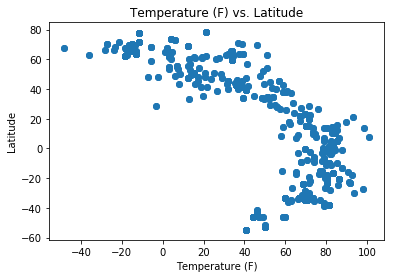

In [56]:
# Build a scatter plot for each data type
plt.scatter(weather['Temperature'], weather['Latitude'], marker='o')
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.title("Temperature (F) vs. Latitude")

Text(0.5,1,'Humidity (%) vs. Latitude')

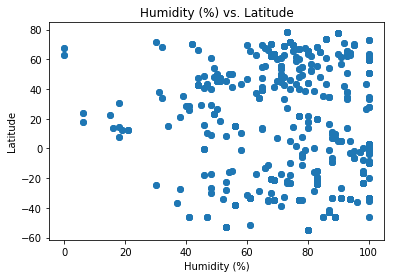

In [57]:
plt.scatter(weather['Humidity'], weather['Latitude'], marker='o')
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Humidity (%) vs. Latitude")

Text(0.5,1,'Cloudiness (%) vs. Latitude')

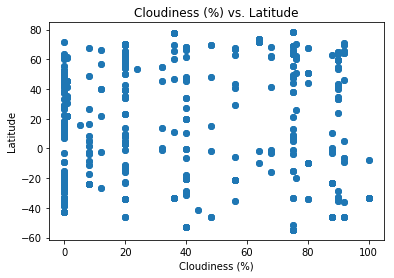

In [61]:
plt.scatter(weather['Cloudiness'], weather['Latitude'], marker='o')
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Cloudiness (%) vs. Latitude")

Text(0.5,1,'Wind Speed (mph) vs. Latitude')

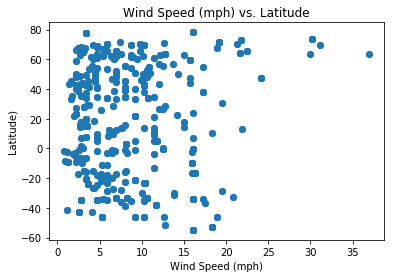

In [64]:
plt.scatter(weather['Wind Speed'], weather['Latitude'], marker='o')
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude)")
plt.title("Wind Speed (mph) vs. Latitude")

In [ ]:
#Analysis: 1. Temprature tends to be lower in places with higher latitude and higher in places with higher latitude 
#          2. There seems to be no correlation between lattitude and cloundiness as the data show no clear trends 
#          3. The latitude does not affect the wind speed; however, the places with higher latitude shows extreme wind speed
# .           than places with lower latitude 